# Introducción a los filtros digitales

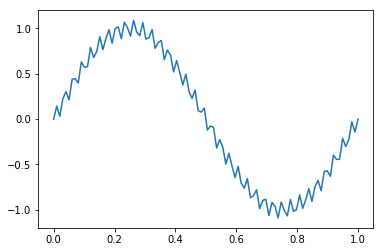

In [44]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

num_points = 100
dur = 1.0
f = 1
t = np.linspace(0,dur,num_points)
señal = np.sin(2*np.pi*f*t)


ruido = 0.1*np.sin(2*np.pi*35*f*t)
#ruido = 0.1*np.random.normal(0, 0.5, num_points)

observacion = señal + ruido


plt.plot(t, observacion, label='$f(t)$')
plt.show()  



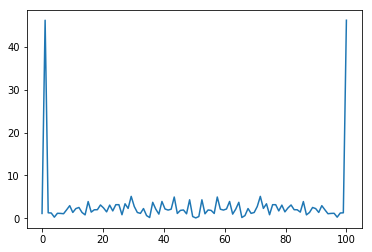

In [16]:
sfreq = np.fft.fft(observacion)
freqs = np.linspace(0,int(num_points/dur),num_points)

plt.plot(freqs,np.abs(sfreq))

## Primera idea: filtro pasa bajos

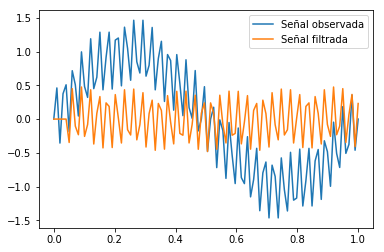

In [31]:
def filtro_pasa_bajos(s):
    sf = np.linspace(0,0,num_points)
    
    for i in range(5,num_points):
        sf[i] = 0.5*(s[i] - s[i-1])
    return sf
    
resultado = filtro_pasa_bajos(observacion)
    
plt.plot(t, observacion, label='Señal observada')
plt.plot(t, resultado, label='Señal filtrada')
plt.legend()
plt.show()  

In [39]:
kernel = (1/20)*np.linspace(1,1,20)
print(kernel)
res_conv = np.convolve(observacion,kernel)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


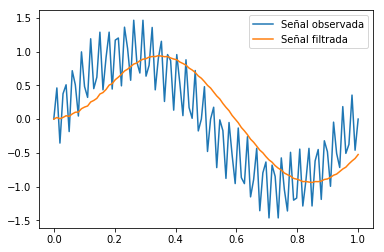

In [40]:
plt.plot(t, observacion, label='Señal observada')
plt.plot(t, res_conv[0:num_points], label='Señal filtrada')
plt.legend()
plt.show()  

In [45]:
kernel = 0.5*np.linspace(1,1,2)
print(kernel)
res_bajo = np.convolve(observacion,kernel)

kernel = 0.5*np.linspace(1,-1,2)
print(kernel)
res_alta = np.convolve(observacion,kernel)

[0.5 0.5]
[ 0.5 -0.5]


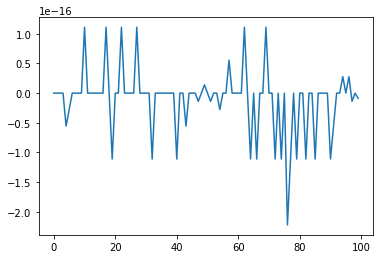

In [58]:
#plt.plot(res_bajo)
#plt.plot(res_alta)
#plt.plot(res_bajo+res_alta)
plt.plot(observacion-((res_bajo+res_alta)[0:num_points]))